In [1]:
# import standard numerical modules
import numpy as np
import math
import tensorflow as tf

import DCTR


2024-04-12 13:29:05.259381: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-04-12 13:29:05.259489: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
data_dir = './Data/'


In [3]:
# Load pre-normed Datasets: MiNNLO: X1 | POWHEG hvq: X0
# only contain tt-pair; every event has order: 
# tt-pair, top, anti-top
# every particle has arguments: 
# [pt, y, phi, mass, eta, E, PID, w, theta]
# [0 , 1, 2  , 3   , 4  , 5, 6  , 7, 8    ]

# POWHEG hvq
# plotting data; different from training data
X0_plt = []
X0_plt = DCTR.load_dataset(f'{data_dir}/POWHEG_hvq/13TeV/03-04_converted_lhe.npz', i=3) # 9553938 num of MiNNLO samples
print('POWHEG hvq all particles X0_plt.shape: '+str(X0_plt.shape))

X0_test = []
X0_test = DCTR.load_dataset(f'{data_dir}/POWHEG_hvq/13TeV/03-04_normed_converted_lhe.npz', i=3)
print('POWHEG hvq all particles X0_test.shape: '+str(X0_test.shape))



POWHEG hvq all particles X0_plt.shape: (63992361, 3, 9)
POWHEG hvq all particles X0_test.shape: (63992361, 3, 9)


In [4]:
# MiNNLO
# plotting data
X1_plt = []
X1_plt = DCTR.load_dataset(f'{data_dir}/MiNNLO/converted_with_13TeV_NLO/converted_lhe.npz', i=3)
print('MiNNLO all particles X1_plt.shape: '+str(X1_plt.shape))


MiNNLO all particles X1_plt.shape: (9553938, 3, 9)


In [6]:
# get normalized event generator weights

X0_plt_wgt = X0_plt[:, 0, 7].copy()
X0_plt_wgt[X0_plt_wgt > 0] = 1 #  masks positive weights and sets them =  1
X0_plt_wgt[X0_plt_wgt < 0] = -1 # masks negative weights and sets them = -1


In [25]:
X1_plt_wgt = X1_plt[:, 0, 7].copy()
X1_plt_wgt[X1_plt_wgt > 0] = 1 #  masks positive weights and sets them =  1
X1_plt_wgt[X1_plt_wgt < 0] = -1 # masks negative weights and sets them = -1


In [7]:
# delete energy
X0_test = np.delete(X0_test, 5, -1)

# delete eta
X0_test = np.delete(X0_test, 4, -1)


In [8]:
model = './best_model.tf'

''' # save weights to .h5 file
dctr = tf.keras.models.load_model(model)
dctr.save('best_model_weights.h5')
'''

# calculate rwgt
with tf.device('CPU'):
    rwgt = DCTR.get_rwgt([model], X0_test) # .tf models also include network architecture. get_rwgt() sets up the network for the (list of) models, then calls predict_weights() like in DCTR_notebook_OLD_14-to-13TeV notebook


2024-04-12 13:54:15.798910: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-04-12 13:54:15.800342: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-04-12 13:54:15.801804: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (finn-ThinkPad-T540p): /proc/driver/nvidia/version does not exist
2024-04-12 13:54:15.861348: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-12 13:54:34.915561: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 3839541

In [27]:
print(np.shape(X0_plt))
print(np.shape(X0_plt_wgt))
print(np.shape(rwgt[0]))
print('\n')
print(np.shape(X1_plt))
print(np.shape(X1_plt_wgt))


(63992361, 3, 9)
(63992361,)
(63992361,)


(9553938, 3, 9)
(9553938,)


In [28]:
# setup args for plotting
args = [(X1_plt, X1_plt_wgt, 'NNLO (MiNNLO)'),
        (X0_plt, X0_plt_wgt, 'NLO (hvq)'),
        (X0_plt, rwgt[0], 'dctr reweighted')]


'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


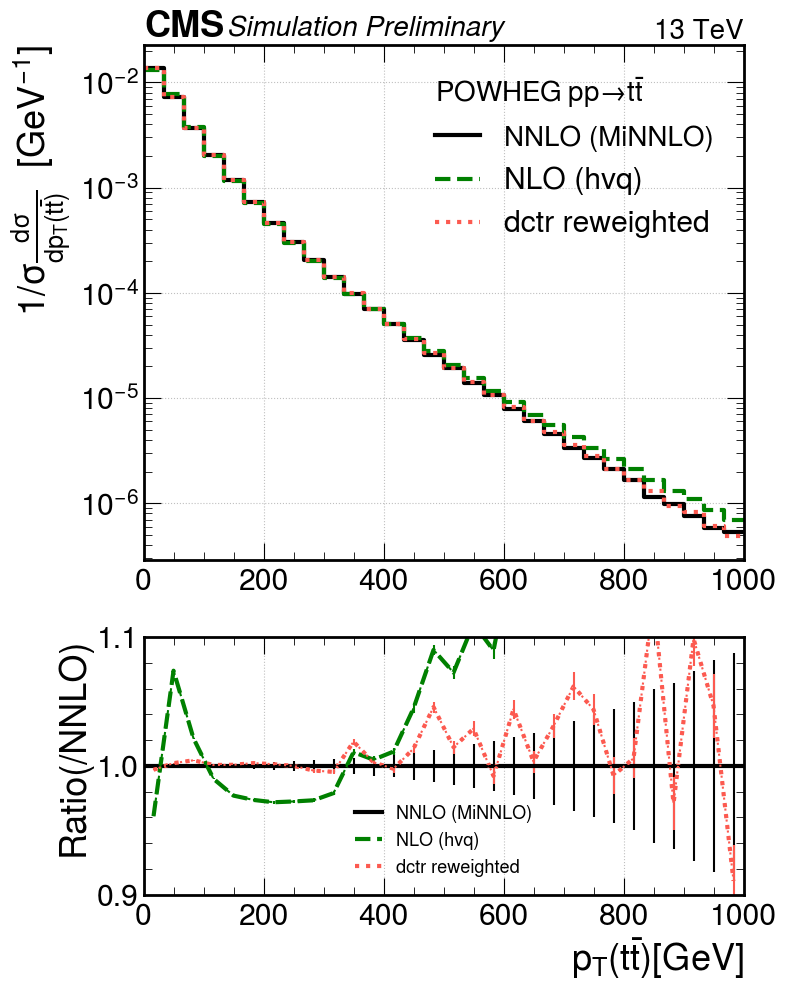

'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


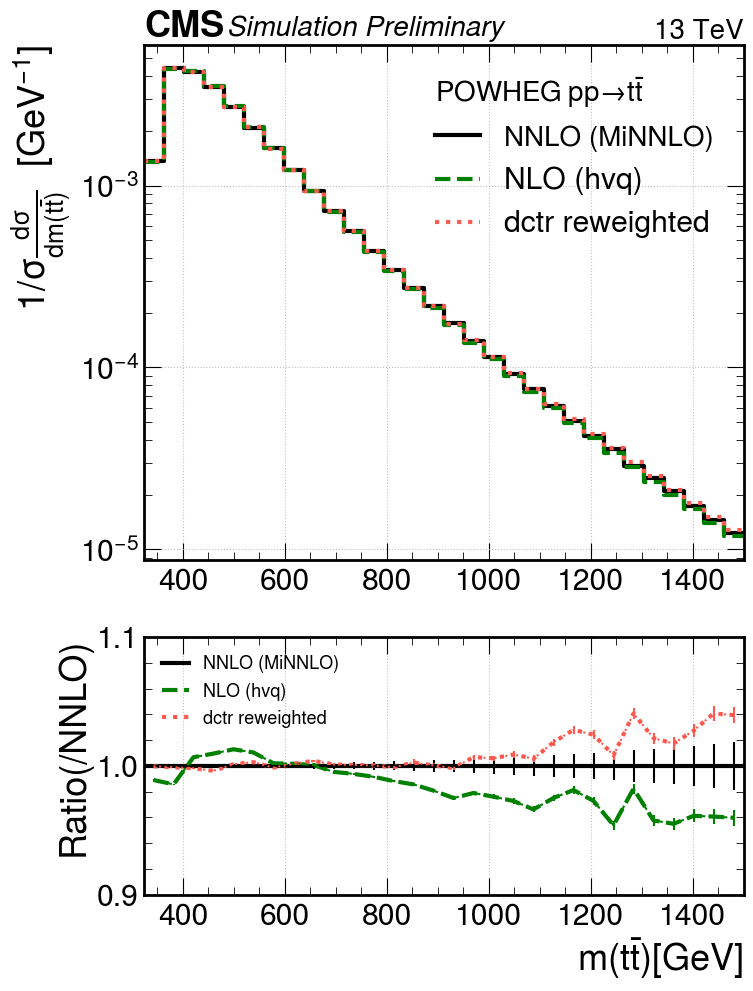

KeyboardInterrupt: 

In [29]:
# plotting everything in CMS style with linear binning
''' plot_ratio_cms arguments
args, arg_index = 0, part_index = 0, title = None, x_label = None, y_label = None, bins = None, start = None, stop = None, div = 35,
ratio_ylim=[0.9,1.1], pythia_text = pythia_text, figsize=(8,10), y_scale=None, hep_text = 'Simulation Preliminary',
center_mass_energy = '13 TeV', part_label=None, arg_label=None, unit=None, inv_unit=None):

'''

arg_indices = [0, 3, 4, 5]
part_indices = [0, 1]

# plot with proper ranges set for each observable
for part_index in part_indices:
    for arg_index in arg_indices:
        div = 31
        if arg_index == 1:  # rapidity
            start = None
            stop = None
        elif arg_index == 3:  # mass
            if part_index == 0:  # tt-pair
                start = None
                stop = 1500
            else:
                start = None
                stop = None
                div = 32
        elif arg_index == 4:  # pseudorapidity
            start = -8
            stop = 8
        elif arg_index == 5: # energy
            if part_index == 0:  # tt-pair
                start = None
                stop = 3000
            else:
                start = None
                stop = 2000
        else:  # pt
            start = 0
            stop = 1000
        
        DCTR.plot_ratio_cms(args, arg_index=arg_index, part_index=part_index, start=start, stop=stop, div=div, y_scale='log', pythia_text=r'$POWHEG \; pp \to  t\bar{t}$')




'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


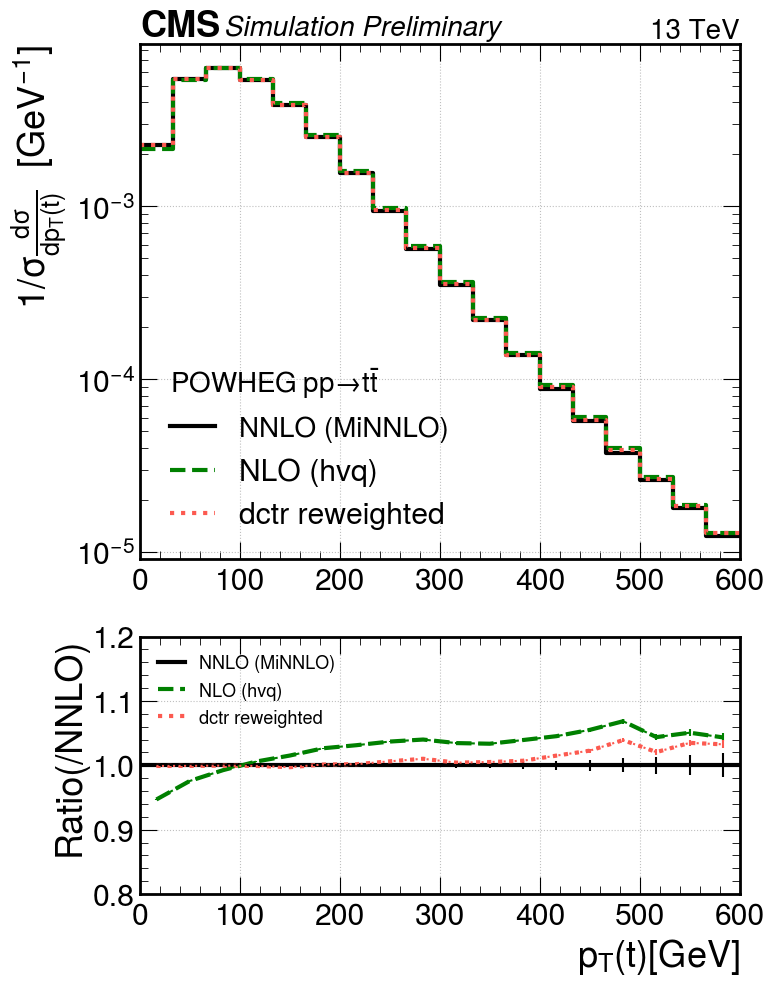

In [30]:
# top p_T

bins = np.linspace(0, 600,19)

DCTR.plot_ratio_cms(args, arg_index=0, part_index=1, bins=bins, y_scale='log', ratio_ylim=[0.8, 1.2], pythia_text=r'$POWHEG \; pp \to  t\bar{t}$')



'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


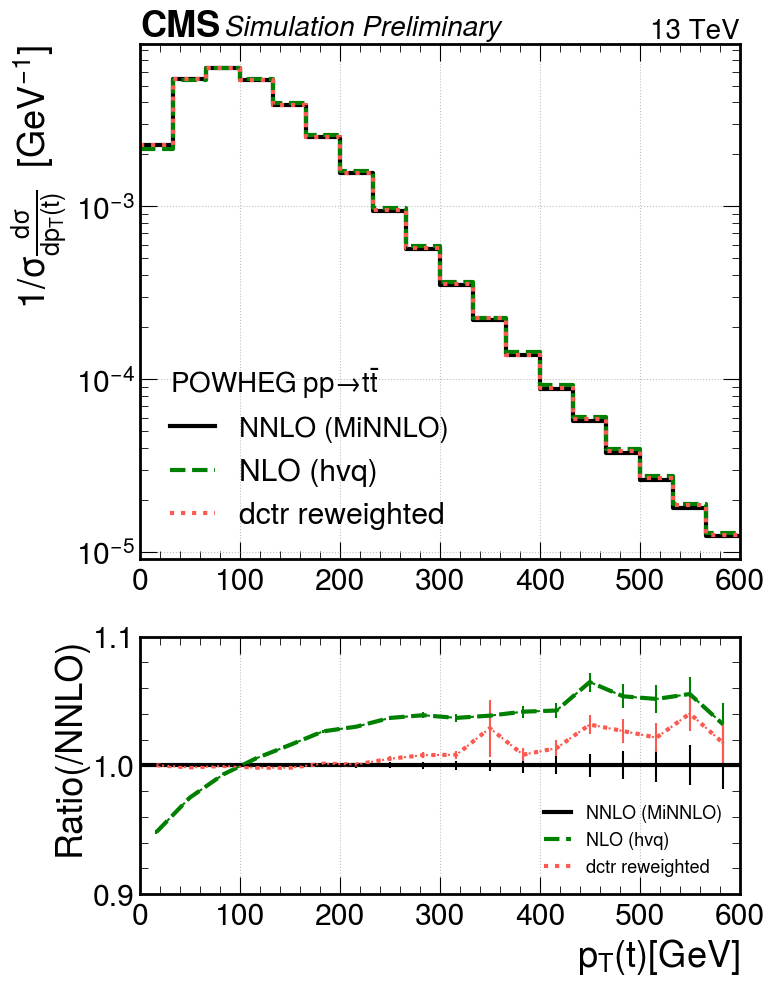

In [34]:
# top vs anti-top p_T with 10M samples

# setup args for plotting
args = [(X1_plt, X1_plt_wgt, 'NNLO (MiNNLO)'),
        (X0_plt[:9553938], X0_plt_wgt[:9553938], 'NLO (hvq)'),
        (X0_plt[:9553938], rwgt[0][:9553938], 'dctr reweighted')]


bins = np.linspace(0, 600,19)

DCTR.plot_ratio_cms(args, arg_index=0, part_index=1, bins=bins, y_scale='log', ratio_ylim=[0.9, 1.1], pythia_text=r'$POWHEG \; pp \to  t\bar{t}$')



'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


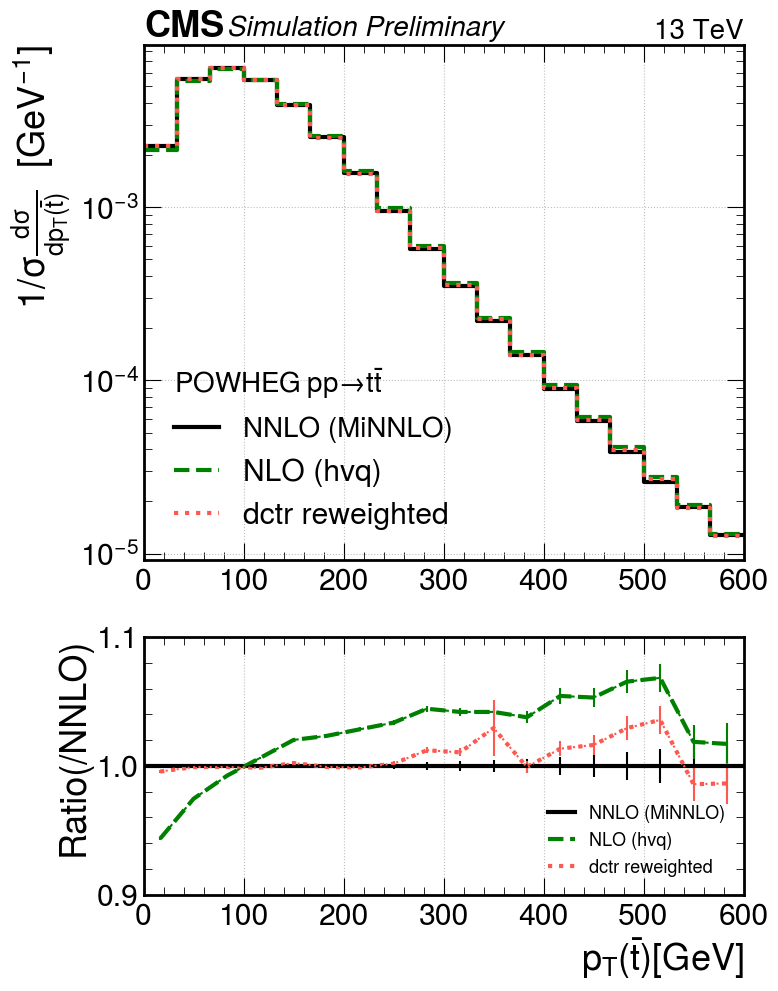

In [35]:
DCTR.plot_ratio_cms(args, arg_index=0, part_index=2, bins=bins, y_scale='log', ratio_ylim=[0.9, 1.1], pythia_text=r'$POWHEG \; pp \to  t\bar{t}$')


'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


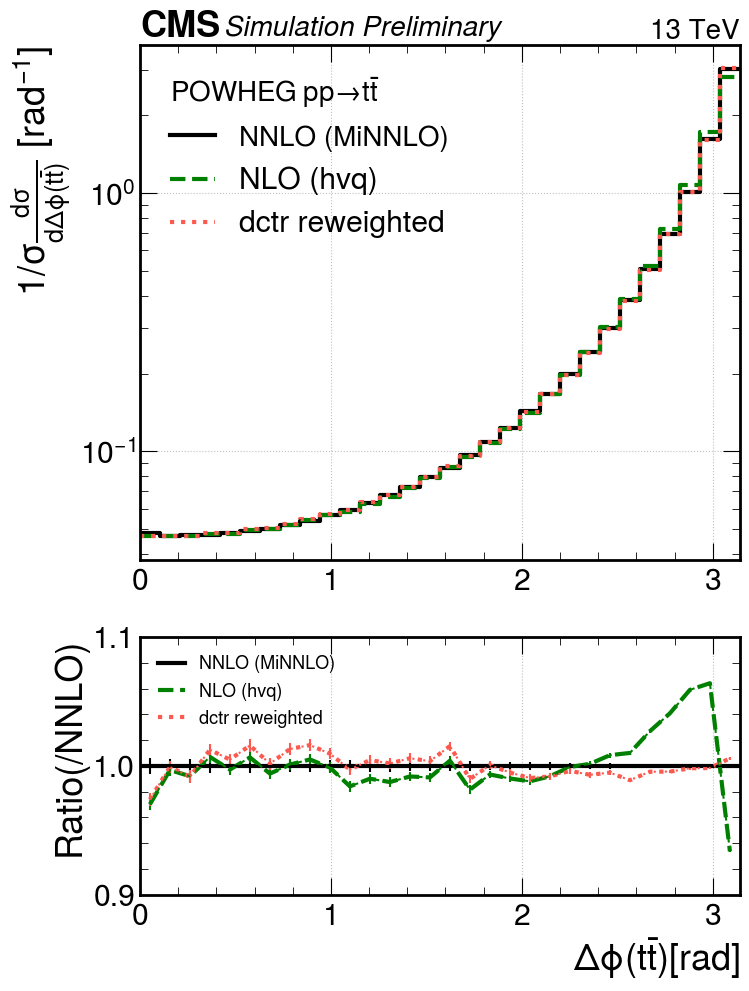

In [ ]:
# delta phi
X0_delta_phi = DCTR.delta_phi(X0_plt)
X1_delta_phi = DCTR.delta_phi(X1_plt)

args_delta_phi = [(X1_delta_phi, X1_plt_wgt, 'NNLO (MiNNLO)'), 
                  (X0_delta_phi, X0_plt_wgt, 'NLO (hvq)'),
                  (X0_delta_phi, rwgt[0], 'dctr reweighted')]


DCTR.plot_ratio_cms(args_delta_phi, start = 0, stop = math.pi, div=31, part_label=r't \bar{t}', arg_label=r'\Delta \phi', unit='[rad]', inv_unit='[rad$^{-1}$]', y_scale='log')


'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


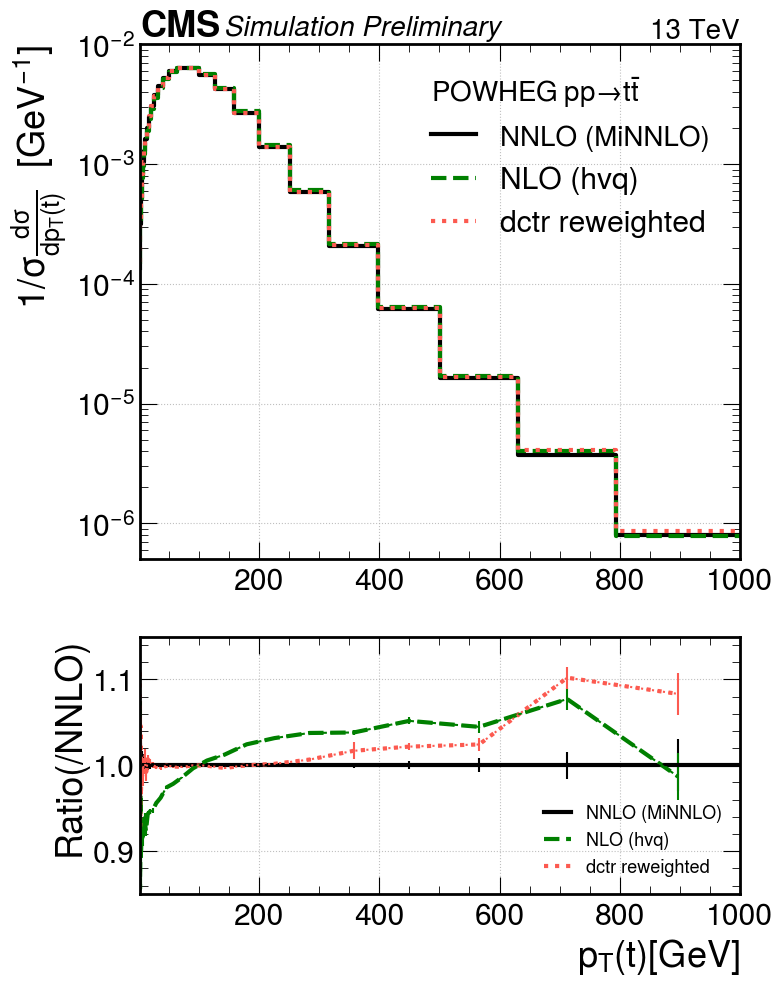

'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


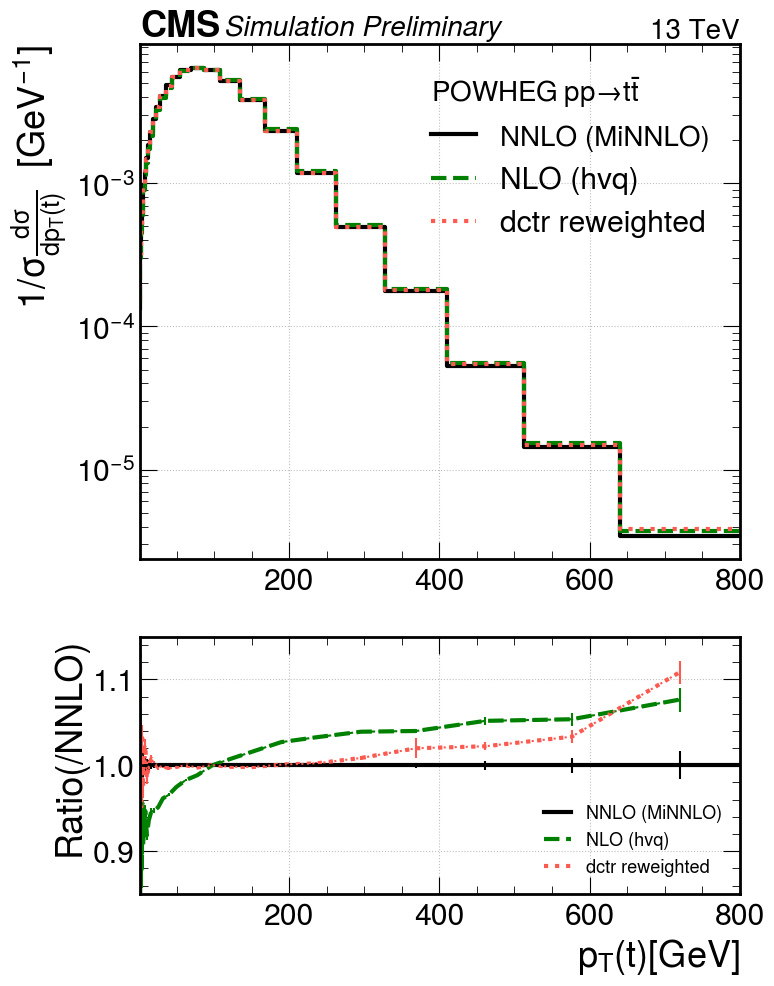

In [ ]:
# p_T (tt) log binning
log_bins = np.logspace(np.log10(1), np.log10(1000), 31)
DCTR.plot_ratio_cms(args, arg_index=0, part_index=0, bins=log_bins, y_scale='log', ratio_ylim=[0.85, 1.15])

# p_t (t) log binning
log_bins = np.logspace(np.log10(1), np.log10(800), 31)
DCTR.plot_ratio_cms(args, arg_index=0, part_index=1, bins=log_bins, y_scale='log', ratio_ylim=[0.85, 1.15])


In [ ]:
print(min(X1_plt[:, 0,5])) # min E tt (NNLO)
print(min(X1_plt[:, 1,5])) # min E t  (NNLO)

print(min(X1_plt[:, 0,3])) # min m tt (NNLO)


329.6132055
159.6472363
322.9727283915917


'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


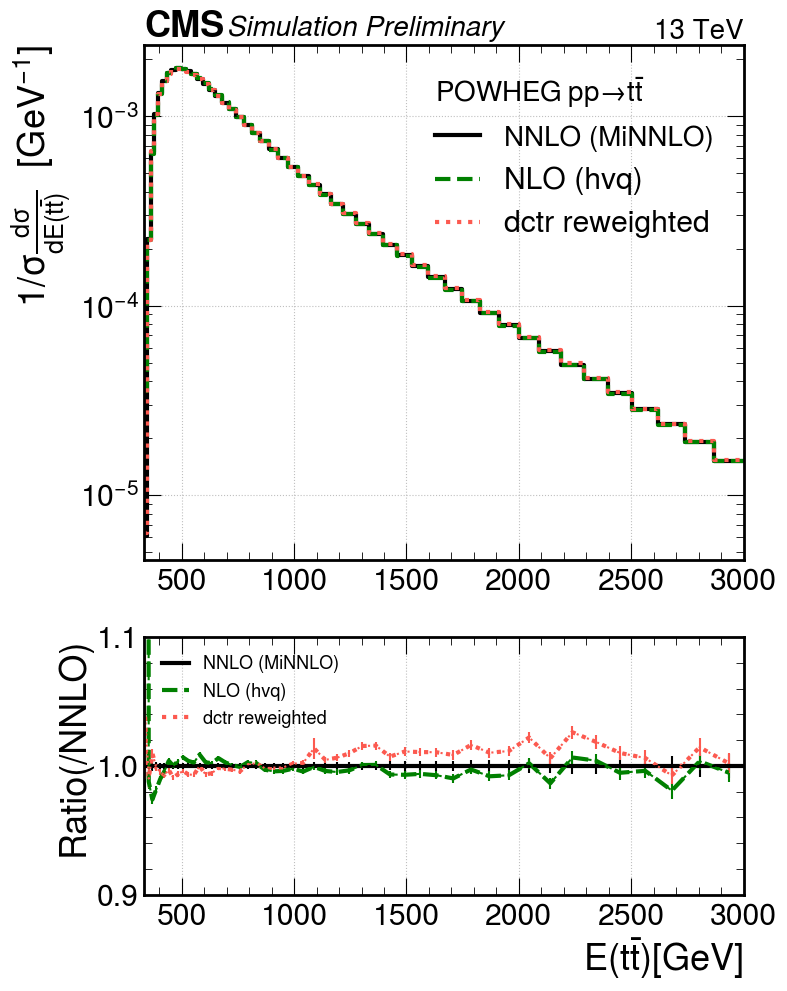

'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


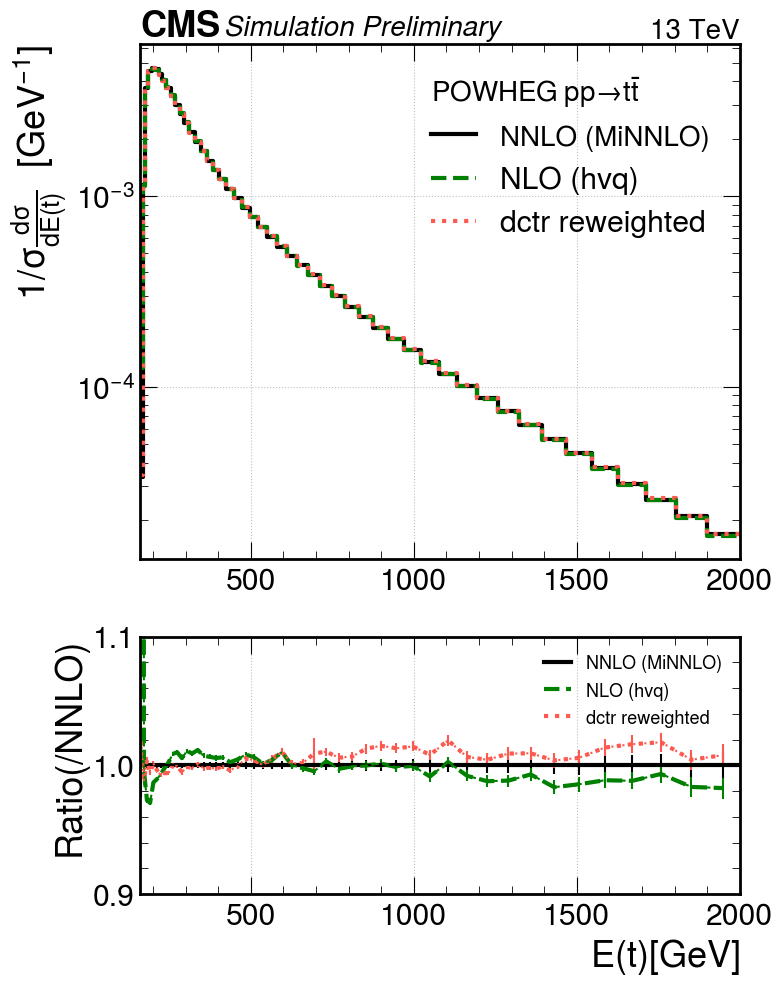

In [ ]:
# E (tt) log binning
log_bins = np.logspace(np.log10(329.6132055), np.log10(3e3), 50)
DCTR.plot_ratio_cms(args, arg_index=5, part_index=0, bins=log_bins, y_scale='log') # , ratio_ylim=[0.8, 1.2])

# E (t) log binning
log_bins = np.logspace(np.log10(159.6472363), np.log10(2e3), 50)
DCTR.plot_ratio_cms(args, arg_index=5, part_index=1, bins=log_bins, y_scale='log') # , ratio_ylim=[0.8, 1.2])



'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


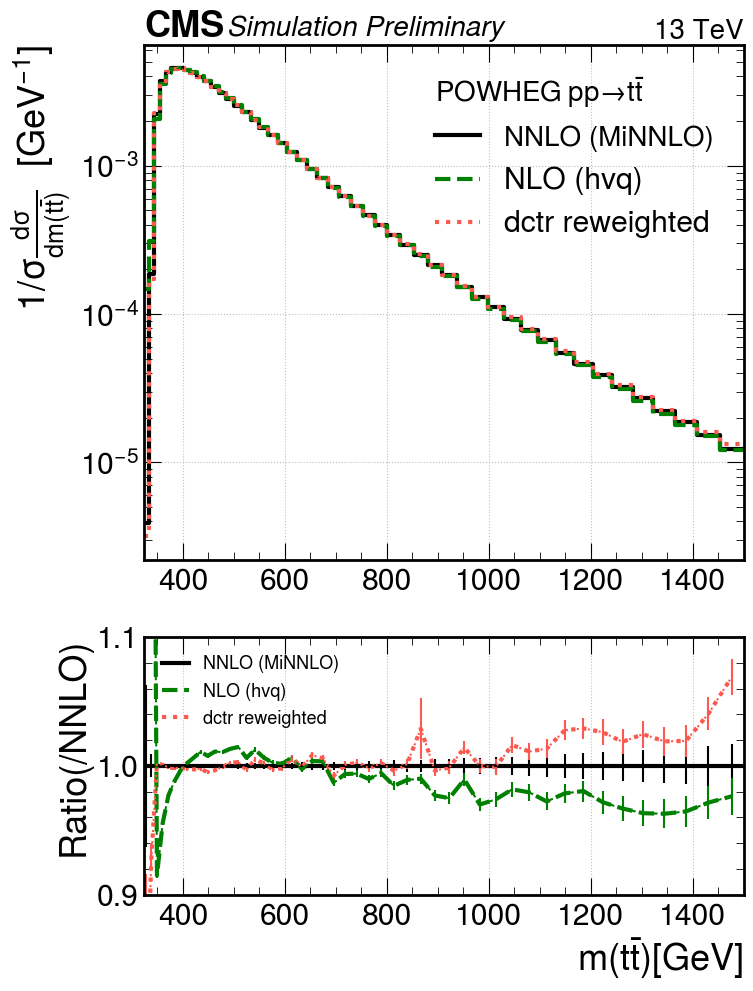

In [ ]:
# m (tt) log binning
log_bins = np.logspace(np.log10(322.9727283915917), np.log10(1.5e3), 50)
DCTR.plot_ratio_cms(args, arg_index=3, part_index=0, bins=log_bins, y_scale='log') # , ratio_ylim=[0.8, 1.2])


'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


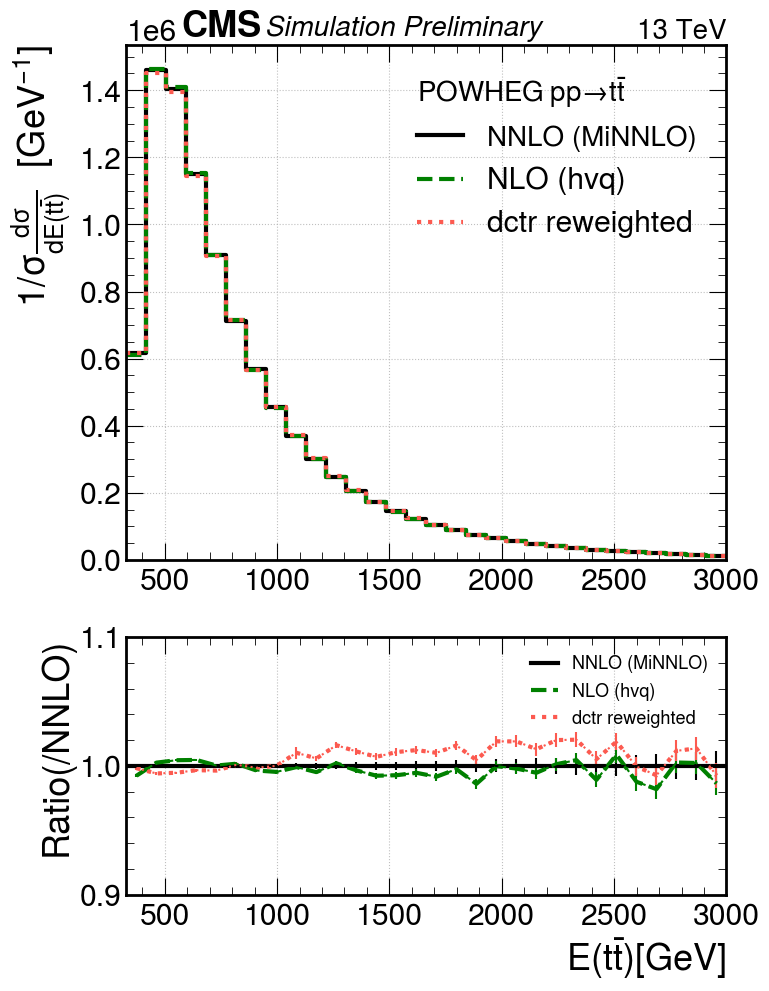

'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


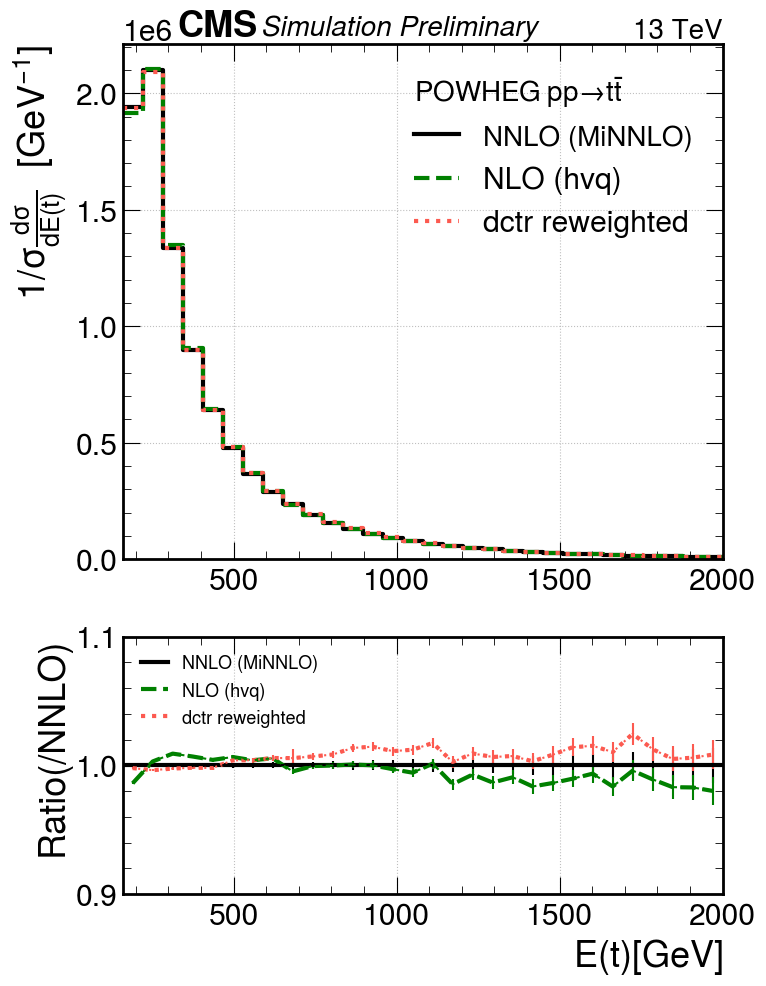

In [ ]:
# E (tt) counts and lin binning and lin y_scale
DCTR.plot_ratio_cms(args, arg_index=5, part_index=0, stop=3000, div=31, density=False) # , y_scale='log') # , ratio_ylim=[0.8, 1.2])

# E (t) counts and lin binning and lin y_scale
DCTR.plot_ratio_cms(args, arg_index=5, part_index=1, stop=2000, div=31, density=False) # , y_scale='log') # , ratio_ylim=[0.8, 1.2])



'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


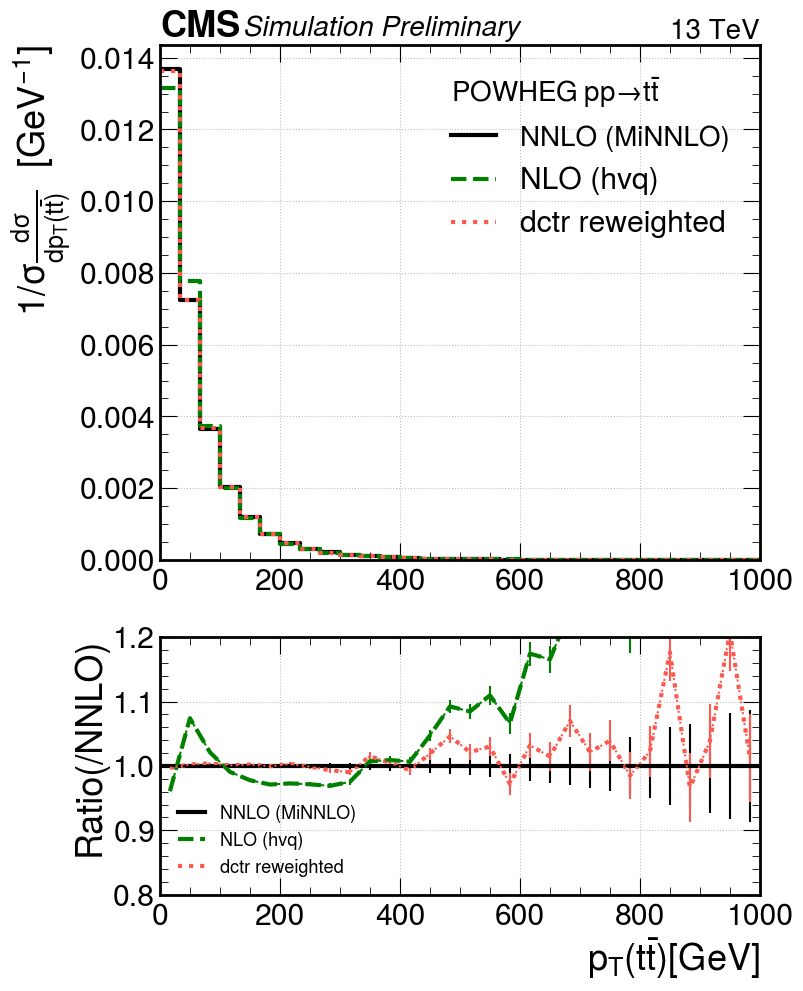

In [ ]:
# p_t (tt) lin bins and lin y_scale, ratio as in bachelor thesis for comparison

DCTR.plot_ratio_cms(args, arg_index=0, part_index=0, start=0, stop=1000, div=31, density=True, ratio_ylim=[0.8, 1.2])



# bin reweighting

# bin rwgt using m(tt) and p_T(t)

In [31]:
from hep_ml.reweight import BinsReweighter

bin_reweighter = BinsReweighter(n_bins=31, n_neighs=2) 

X0_bin_rwgt_org = []
X1_bin_rwgt_target = []

# decide which (2) dimensions to do the bin rwgt along
X0_bin_rwgt_org.append(X0_plt[:,0,3]) # m(tt)
X0_bin_rwgt_org.append(X0_plt[:,1,0]) # p_T(t)
X0_bin_rwgt_org = np.transpose(X0_bin_rwgt_org) # wants to be [num_samples, num_dim]

X1_bin_rwgt_target.append(X1_plt[:,0,3]) # p_m(tt)
X1_bin_rwgt_target.append(X1_plt[:,1,0]) # p_T(t)
X1_bin_rwgt_target = np.transpose(X1_bin_rwgt_target)

# print(f'X0_bin_rwgt_org: {np.array(X0_bin_rwgt_org)}')
# print(f'X1_bin_rwgt_target: {np.array(X1_bin_rwgt_target)}')

print(f'X0_bin_rwgt_org.shape: {np.shape(X0_bin_rwgt_org)}')
print(f'X0_plt_wgt length: {len(X0_plt_wgt)}')
print(f'X1_bin_rwgt_target.shape: {np.shape(X1_bin_rwgt_target)}')
print(f'X1_plt_wgt length: {len(X1_plt_wgt)}')

bin_reweighter.fit(original=X0_bin_rwgt_org, target=X1_bin_rwgt_target,
               original_weight=X0_plt_wgt, target_weight=X1_plt_wgt)


bin_rwgt = bin_reweighter.predict_weights(X0_bin_rwgt_org, original_weight=X0_plt_wgt)



X0_bin_rwgt_org.shape: (63992361, 2)
X0_plt_wgt length: 63992361
X1_bin_rwgt_target.shape: (9553938, 2)
X1_plt_wgt length: 9553938


'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


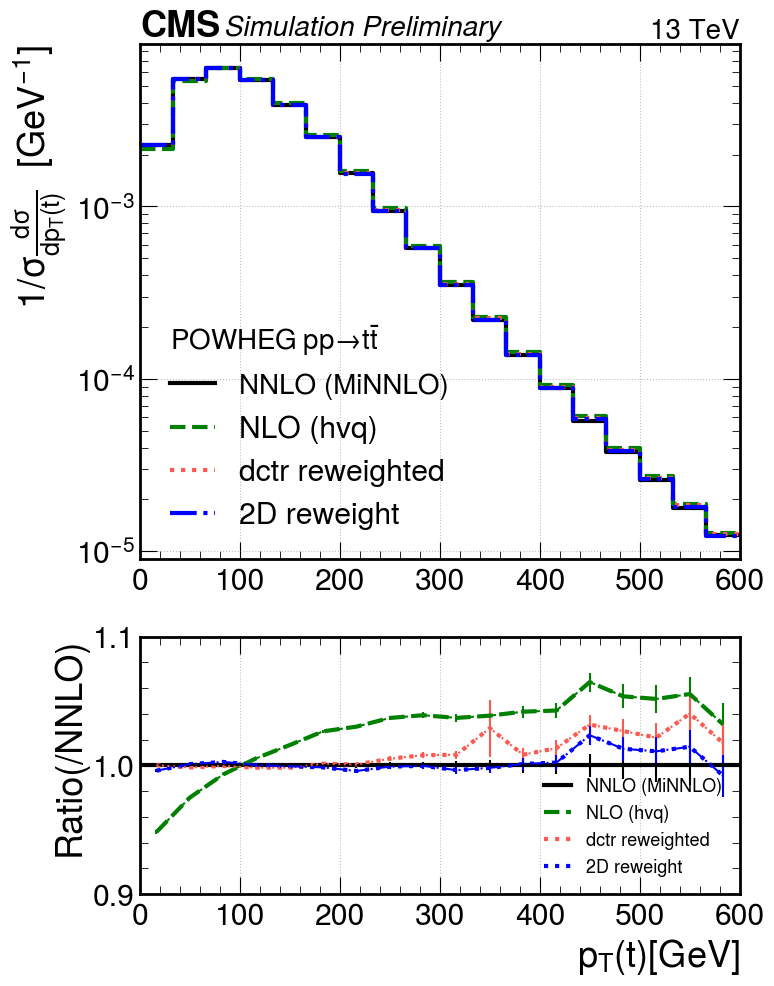

In [40]:
# p_T tt-pair dctr vs 2D bin rwgt

# setup args for plotting
args_bin = [(X1_plt, X1_plt_wgt, 'NNLO (MiNNLO)'),
            (X0_plt[:9553938], X0_plt_wgt[:9553938], 'NLO (hvq)'),
            (X0_plt[:9553938], rwgt[0][:9553938], 'dctr reweighted'),
            (X0_plt[:9553938], bin_rwgt[:9553938], '2D reweight')]



# p_T(tt)
# DCTR.plot_ratio_cms_4(args_bin, arg_index=0, part_index=0 ,bins=bins, y_scale='log', ratio_ylim=[0.8,1.2])
# print(DCTR.plot_ratio(args_bin, arg_index=0, part_index=0 ,bins=bins, stats_only=True))

# p_T(t)
DCTR.plot_ratio_cms_4(args_bin, arg_index=0, part_index=1, start = 0, stop = 600, div=19, y_scale='log', ratio_ylim=[0.9,1.1])
print(DCTR.plot_ratio(args_bin, arg_index=0, part_index=1, start = 0, stop = 600, div=19, stats_only=True))

# p_T(anti-top)
DCTR.plot_ratio_cms_4(args_bin, arg_index=0, part_index=2, start = 0, stop = 600, div=19, y_scale='log', ratio_ylim=[0.9,1.1])
print(DCTR.plot_ratio(args_bin, arg_index=0, part_index=2, start = 0, stop = 600, div=19, stats_only=True))


# m(tt)
DCTR.plot_ratio_cms_4(args_bin, arg_index=0, part_index=1, stop = 1500, div = 31, y_scale='log', ratio_ylim=[0.9,1.1])
print(DCTR.plot_ratio(args_bin, arg_index=0, part_index=1, stop = 1500, div = 31, stats_only=True))


In [ ]:
from hep_ml.reweight import BinsReweighter

bin_reweighter = BinsReweighter(n_bins=31, n_neighs=2) 

X0_bin_rwgt_org = []
X1_bin_rwgt_target = []

# decide which (2) dimensions to do the bin rwgt along
X0_bin_rwgt_org.append(X0_plt[:,0,3]) # m(tt)
X0_bin_rwgt_org.append(X0_plt[:,1,0]) # p_T(t)
X0_bin_rwgt_org = np.transpose(X0_bin_rwgt_org) # wants to be [num_samples, num_dim]

X1_bin_rwgt_target.append(X1_plt[:,0,3]) # p_m(tt)
X1_bin_rwgt_target.append(X1_plt[:,1,0]) # p_T(t)
X1_bin_rwgt_target = np.transpose(X1_bin_rwgt_target)

# print(f'X0_bin_rwgt_org: {np.array(X0_bin_rwgt_org)}')
# print(f'X1_bin_rwgt_target: {np.array(X1_bin_rwgt_target)}')

print(f'X0_bin_rwgt_org.shape: {np.shape(X0_bin_rwgt_org)}')
print(f'X0_plt_wgt length: {len(X0_plt_wgt)}')
print(f'X1_bin_rwgt_target.shape: {np.shape(X1_bin_rwgt_target)}')
print(f'X1_plt_wgt length: {len(X1_plt_wgt)}')

bin_reweighter.fit(original=X0_bin_rwgt_org, target=X1_bin_rwgt_target,
               original_weight=X0_plt_wgt, target_weight=X1_plt_wgt)


bin_rwgt = bin_reweighter.predict_weights(X0_bin_rwgt_org, original_weight=X0_plt_wgt)



'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


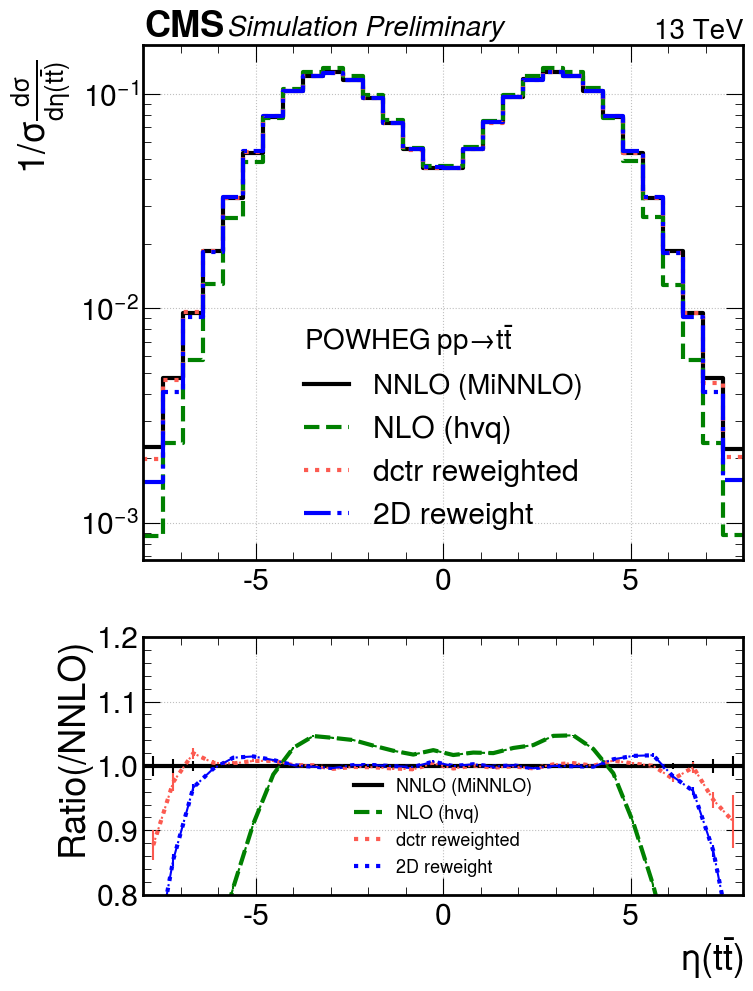

NNLO (MiNNLO): mean: 0.001, std: 3.417, max/min: 13.830049878532156/-13.20077537478709 
 Mean Absolute Error 0.0 
 Mean Relative Error 0.0 
 reduced chi square of 0.0 with p 1.0 
 compared to NNLO (MiNNLO)
NLO (hvq): mean: -0.000, std: 3.291, max/min: 10.023277969879556/-11.59612611504899 
 Mean Absolute Error 17576.687280635633 
 Mean Relative Error 0.32377702686596915 
 reduced chi square of 1026.209495708376 with p 0.0 
 compared to NNLO (MiNNLO)
dctr reweighted: mean: -0.003, std: 3.413, max/min: 10.023277969879556/-11.59612611504899 
 Mean Absolute Error 1422.1624579249667 
 Mean Relative Error 0.023577718064188957 
 reduced chi square of 6.6202899489302185 with p 5.916584079247928e-26 
 compared to NNLO (MiNNLO)
2D reweight: mean: 0.000, std: 3.399, max/min: 10.023277969879556/-11.59612611504899 
 Mean Absolute Error 2114.06923718335 
 Mean Relative Error 0.0688895980886572 
 reduced chi square of 79.06467718847257 with p 0.0 
 compared to NNLO (MiNNLO)
([0.0, 17576.687280635633,

In [11]:
# eta tt-pair dctr vs 2D bin rwgt

DCTR.plot_ratio_cms_4(args_bin, arg_index=4, start = -8, stop = 8, div = 31, y_scale='log', ratio_ylim=[0.8,1.2])
print(DCTR.plot_ratio(args_bin, arg_index=4, start = -8, stop = 8, div = 31, stats_only=True))



'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


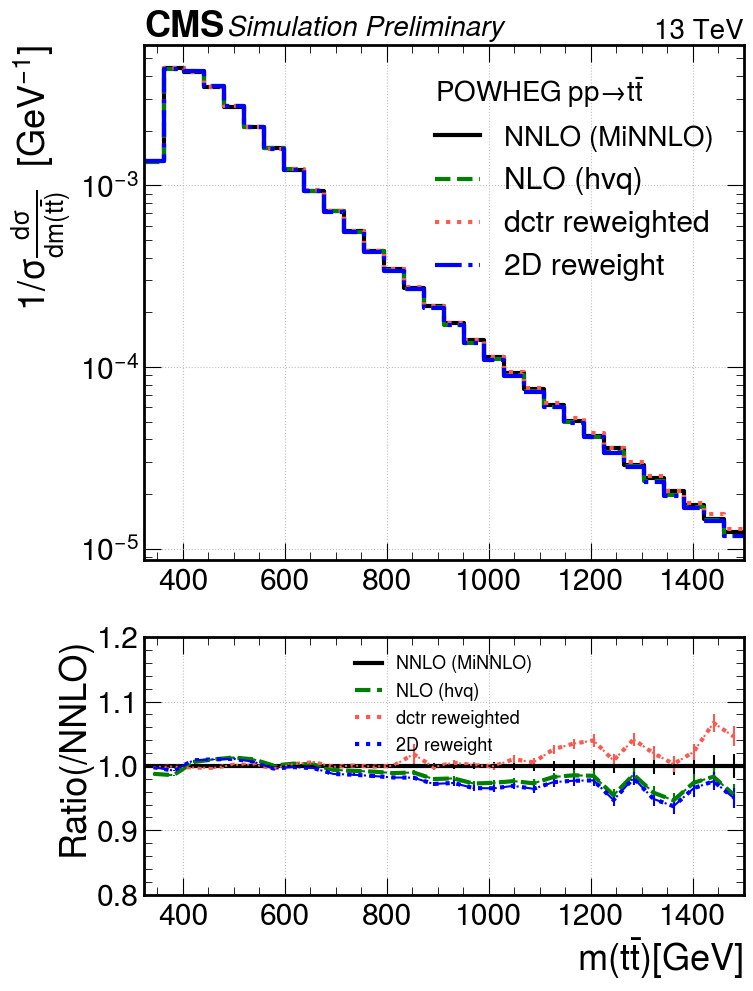

NNLO (MiNNLO): mean: 523.184, std: 178.057, max/min: 5626.682794956003/322.9727283915917 
 Mean Absolute Error 0.0 
 Mean Relative Error 0.0 
 reduced chi square of 0.0 with p 1.0 
 compared to NNLO (MiNNLO)
NLO (hvq): mean: 522.032, std: 176.366, max/min: 4957.45130467695/222.74225458209077 
 Mean Absolute Error 3278.951952761269 
 Mean Relative Error 0.020478748434799823 
 reduced chi square of 21.554008762417453 with p 4.0302167241581296e-113 
 compared to NNLO (MiNNLO)
dctr reweighted: mean: 523.942, std: 179.742, max/min: 4957.45130467695/222.74225458209077 
 Mean Absolute Error 957.2576824732145 
 Mean Relative Error 0.012536994181573391 
 reduced chi square of 4.466536407640613 with p 1.1534996113620487e-14 
 compared to NNLO (MiNNLO)
2D reweight: mean: 521.304, std: 175.973, max/min: 4957.45130467695/222.74225458209077 
 Mean Absolute Error 3529.347724521457 
 Mean Relative Error 0.02647096855553168 
 reduced chi square of 26.93072218233828 with p 1.1183012195257441e-145 
 comp

In [12]:
# p_T tt-mass dctr vs 2D bin rwgt

DCTR.plot_ratio_cms_4(args_bin, arg_index=3, start = None, stop = 1500, div=31, y_scale='log', ratio_ylim=[0.8,1.2])
print(DCTR.plot_ratio(args_bin, arg_index=3, start = None, stop = 1500, div=31, stats_only=True))



# stats


In [14]:
# DCTR.plot_ratio()
# takes args in form [(X0, wgt0, label0),(X1, wgt1, label1), etc.]
# plots histograms of X's and a ratio plot comapring all X's to X0 (first input in args)
# calculates, prints and returns mae, chi2 and p-value (from chi2 and num_bins)
# default parameters: 
    # arg_index = 0, part_index = 0, # which observable from the dataset to plot. Ignored if 1D dataset is passed (like in delta phi above)
    # title = None, x_label = None, y_label = None, # if None are given, generate title, etc. from arg/part index
    # bins = None, start = None, stop = None, div = 35, # if bins is None generate binning with start/stop if None are given use min/max
    # ratio_ylim=[0.9,1.1], figsize=(8,8), layout='rows', stats_only=False # plotting args

args_bin = [(X1_plt, X1_plt_wgt, 'NNLO (MiNNLO)'),
            (X0_plt, X0_plt_wgt, 'NLO (hvq)'),
            (X0_plt, rwgt[0], 'dctr reweighted'),
            (X0_plt, bin_rwgt, '2D reweight')]

arg_indices = [0, 3, 4, 5]
part_indices = [0, 1]

mae_all = []
chi2_all = []
p_all = []

# set plotting parameters
for part_index in part_indices:
    for arg_index in arg_indices:
        bins = []
        ratio_ylim = [0.75, 1.25]
        div = 31
        if arg_index == 1:  # rapidity
            start = None
            stop = None
        elif arg_index == 3:  # mass
            if part_index == 0:  # tt-pair
                start = None
                stop = 1500
                ratio_ylim = [0.90, 1.10]
            else:
                start = None
                stop = None
                div = 32
                ratio_ylim = [0.85, 1.15]
        elif arg_index == 4:  # pseudorapidity
            start = -9
            stop = 9
        elif arg_index == 5: # energy
            ratio_ylim = [0.9, 1.10]
            if part_index == 0:  # tt-pair
                start = None
                stop = 3000
            else:
                start = None
                stop = 2000
        else:  # pt
            ratio_ylim = [0.8, 1.2]
            start = 0
            stop = 1000
        
        # plot and calculate stats
        mae_list, chi2_list, p_list = DCTR.plot_ratio(args_bin, arg_index=arg_index, part_index=part_index, start=start, stop=stop, div=div, ratio_ylim=ratio_ylim, stats_only=True, verbose=False)

        # save stats
        mae_all.append(mae_list)
        chi2_all.append(chi2_list)
        p_all.append(p_list)



# delta phi
X0_delta_phi = DCTR.delta_phi(X0_plt)
X1_delta_phi = DCTR.delta_phi(X1_plt)

args_delta_phi = [(X1_delta_phi, X1_plt_wgt, 'NNLO (MiNNLO)'), 
                  (X0_delta_phi, X0_plt_wgt, 'NLO (hvq)'),
                  (X0_delta_phi, rwgt[0], 'dctr reweighted'),
                  (X0_delta_phi, bin_rwgt, '2D reweight')]


mae_list, chi2_list, p_list = DCTR.plot_ratio(args_delta_phi, start = 0, stop = math.pi, div=31, stats_only=True, verbose=False)

# save stats
mae_all.append(mae_list)
chi2_all.append(chi2_list)
p_all.append(p_list)

# mean stats for each in args
mae_mean = np.mean(mae_all, axis = 0)
chi2_mean = np.mean(chi2_all, axis = 0)
p_mean = np.mean(p_all, axis = 0)


print('[NNLO], [NLO (hvq)], [dctr reweighted], [2D reweight] \n')
print(f'MAE  mean: {mae_mean} \n')
print(f'chi2 mean: {chi2_mean} \n')
print(f'p    mean: {p_mean} \n')



[NNLO], [NLO (hvq)], [dctr reweighted], [2D reweight] 

MAE  mean: [   0.         9238.37820635 1093.77424159 4950.41699344] 

chi2 mean: [   0.         1176.76242537    4.69437408  992.91734458] 

p    mean: [1.00000000e+00 1.43677251e-05 2.93676920e-03 5.12740170e-06] 

